In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from datetime import datetime


In [2]:
tmdb_data = pd.read_csv('tmdb-movies.csv')
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
tmdb_data.shape

(10866, 21)

In [5]:
tmdb_data.drop(labels = ['id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average'],axis =1,inplace =True)
tmdb_data.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


In [8]:
tmdb_data.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
tagline            object
runtime             int64
genres             object
release_date       object
release_year        int64
dtype: object

In [6]:
tmdb_data.drop_duplicates(inplace=True)
tmdb_data.duplicated().sum()

0

In [7]:
temp_list=['budget', 'revenue']
tmdb_data[temp_list] = tmdb_data[temp_list].replace(0, np.NAN)
tmdb_data.dropna(subset = temp_list, inplace = True)
tmdb_data.describe()

,popularity,budget,revenue,runtime,release_year
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,1.475162,4.220822e+07,1.765393e+08,19.922820,11.282575
min,0.001117,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,0.462367,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,2015.000000


In [8]:
tmdb_data.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


In [9]:
tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])
tmdb_data.head()

C:\Users\smart\AppData\Local\Temp\ipykernel_8636\2631358094.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])


,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [10]:
tmdb_data['runtime'] =tmdb_data['runtime'].replace(0, np.NAN)
tmdb_data.dtypes

popularity               float64
budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [11]:
change_type=['budget', 'revenue']
tmdb_data[change_type]=tmdb_data[change_type].applymap(np.int64)
tmdb_data.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [36]:
tmdb_data.to_csv('tmdb-movies-new.csv', index= False)

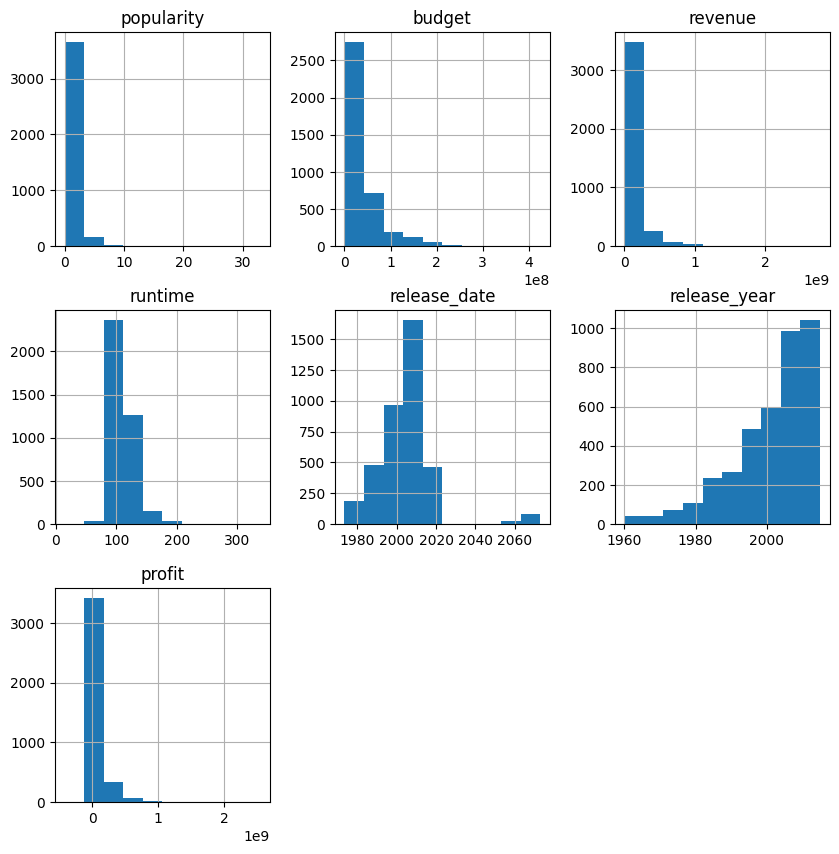

In [37]:
tmdb_data.hist(figsize = (10, 10));

## 1-Movies which had most and least profit


In [15]:
tmdb_data['profit']=tmdb_data['revenue']-tmdb_data['budget']
tmdb_data

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015,1316249360
...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,You are cordially invited to George and Martha...,131,Drama,2066-06-21,1966,26236689
10828,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,It tears you apart with suspense!,128,Mystery|Thriller,2066-07-13,1966,10000000
10829,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,It's the Big One with the Big Two,120,Action|Western,2066-12-17,1966,1347000
10835,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,This is the heroic story of the men on the U.S...,182,Action|Adventure|Drama|War|Romance,2066-12-20,1966,8000000


In [17]:
tmdb_data['profit'].max() , tmdb_data['profit'].min() 

(2544505847, -413912431)

In [18]:
tmdb_data.query('profit == 2544505847 ')

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,profit
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,2009,2544505847


In [19]:
tmdb_data.query('profit == -413912431 ')

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,profit
2244,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Assassin. Hero. Legend.,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,2010,-413912431


AttributeError: module 'matplotlib.pyplot' has no attribute 'xx'

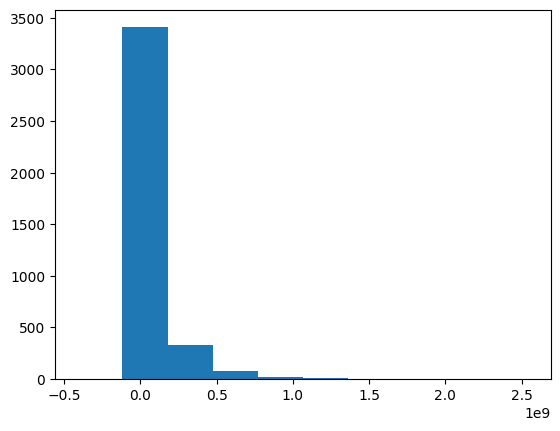

<Figure size 5000x10000 with 0 Axes>

In [20]:

plt.hist((tmdb_data['profit']))
plt.figure(figsize=(50, 100))
plt.xx

the highest profit = 2544505847 ,the lowest profit - 413912431
the move with hightest profit is Avatar , the lowest is The Warrior's Way

In [ ]:
tmdb_data['profit'].mean() 

## Movies with longest and shortest runtime values

In [21]:
tmdb_data['runtime'].max() , tmdb_data['runtime'].min() 

(338, 15)

In [22]:
tmdb_data.query('runtime == 338 ')

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,profit
2107,0.534192,18000000,871279,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,The man who hijacked the world,338,Crime|Drama|Thriller|History,2010-05-19,2010,-17128721


In [23]:
tmdb_data.query('runtime == 338 ')

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,profit
5162,0.208637,10,5,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,NaN,15,Science Fiction|Animation,2003-06-02,2003,-5


<function matplotlib.pyplot.show(close=None, block=None)>

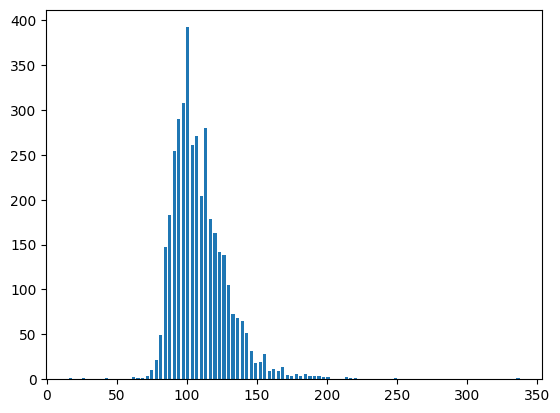

In [24]:
plt.hist(tmdb_data['runtime'], rwidth = 0.7,bins =100)
plt.show

In [25]:
tmdb_data['runtime'].mean() 

109.22029060716139

## Most Frequent star cast

In [26]:
data = tmdb_data['cast'].str.cat(sep = '|')

data = pd.Series(data.split('|'))

count = data.value_counts(ascending = False)

count

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
                     ..
Zoe Aggeliki          1
Jan Broberg           1
Matt Bush             1
Katrina Bowden        1
Raquel Welch          1
Name: count, Length: 6839, dtype: int64

## Successful genres that have high profit

In [27]:
# create new dataframe according the highest 1500 profit
profit_ana = tmdb_data.nlargest(1500 ,'profit')
profit_ana

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,profit
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,2009,2544505847
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Nothing on Earth could come between them.,194,Drama|Romance|Thriller,1997-11-18,1997,1645034188
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015,1316249360
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,1.306241,40000000,79700000,What to Expect When You're Expecting,Cameron Diaz|Jennifer Lopez|Elizabeth Banks|An...,Kirk Jones,It's too late to pull out now.,110,Romance|Comedy|Drama,2012-05-17,2012,39700000
3970,0.936666,75000000,114660784,We Were Soldiers,Mel Gibson|Greg Kinnear|Madeleine Stowe|Sam El...,Randall Wallace,400 U.S paratroopers. 4000 Vietnamese soldiers...,138,Action|History|War,2002-03-01,2002,39660784
2684,0.875299,35000000,74558115,From Hell,Johnny Depp|Heather Graham|Ian Holm|Robbie Col...,Albert Hughes|Allen Hughes,Only the legend will survive.,122,Horror|Mystery|Thriller,2001-10-19,2001,39558115
3515,0.785489,24000000,63543328,Footloose,Kenny Wormald|Julianne Hough|Dennis Quaid|Andi...,Craig Brewer,There comes a time to cut loose.,113,Drama|Music|Romance,2011-10-06,2011,39543328


In [28]:
suc_genre = profit_ana['genres'].str.cat(sep = '|')

suc_genre = pd.Series(suc_genre.split('|'))

suc_genre = suc_genre.value_counts(ascending = False)

suc_genre

Drama              557
Comedy             544
Action             507
Thriller           457
Adventure          402
Romance            247
Family             242
Crime              228
Science Fiction    219
Fantasy            212
Horror             143
Animation          129
Mystery            122
Music               54
War                 50
History             47
Western             16
Documentary          6
Foreign              1
Name: count, dtype: int64

<Axes: >

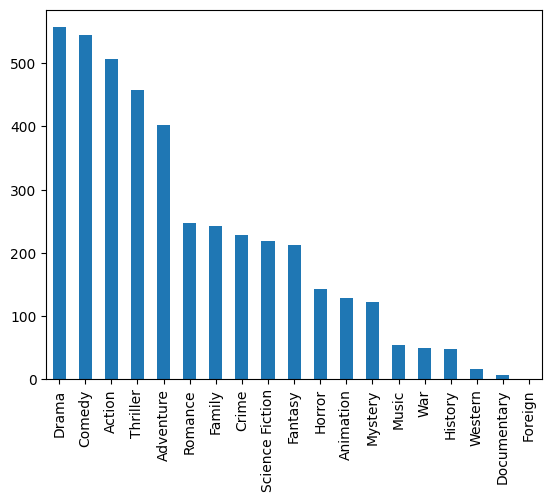

In [29]:
suc_genre.plot(kind='bar')

## kinds of properties are associated with movies that have high revenues?

In [30]:
# create new dataframe according the highest 1000 revenues
df = tmdb_data.nlargest(1000 ,'revenue')
df

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,profit
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,2009,2544505847
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Nothing on Earth could come between them.,194,Drama|Romance|Thriller,1997-11-18,1997,1645034188
4361,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Some assembly required.,143,Science Fiction|Action|Adventure,2012-04-25,2012,1299557910
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
...,...,...,...,...,...,...,...,...,...,...,...,...
4205,0.948788,38000000,120000000,Star Trek: Generations,Patrick Stewart|Jonathan Frakes|Brent Spiner|L...,David Carson,Boldly go.,118,Science Fiction|Action|Adventure|Thriller,1994-11-17,1994,82000000
9989,1.243528,42000000,119946358,Rocky V,Sylvester Stallone|Talia Shire|Burt Young|Sage...,John G. Avildsen,Go for it!,104,Drama,1990-10-18,1990,77946358
5048,0.548853,60000000,119940815,Intolerable Cruelty,George Clooney|Catherine Zeta-Jones|Edward Her...,Joel Coen,They can't keep their hands off each others as...,100,Crime|Comedy|Romance,2003-09-02,2003,59940815
4556,0.494391,25000000,119772232,Parental Guidance,Billy Crystal|Bette Midler|Marisa Tomei|Tom Ev...,Andy Fickman,Here come the grandparents. There go the rules.,104,Comedy,2012-12-25,2012,94772232


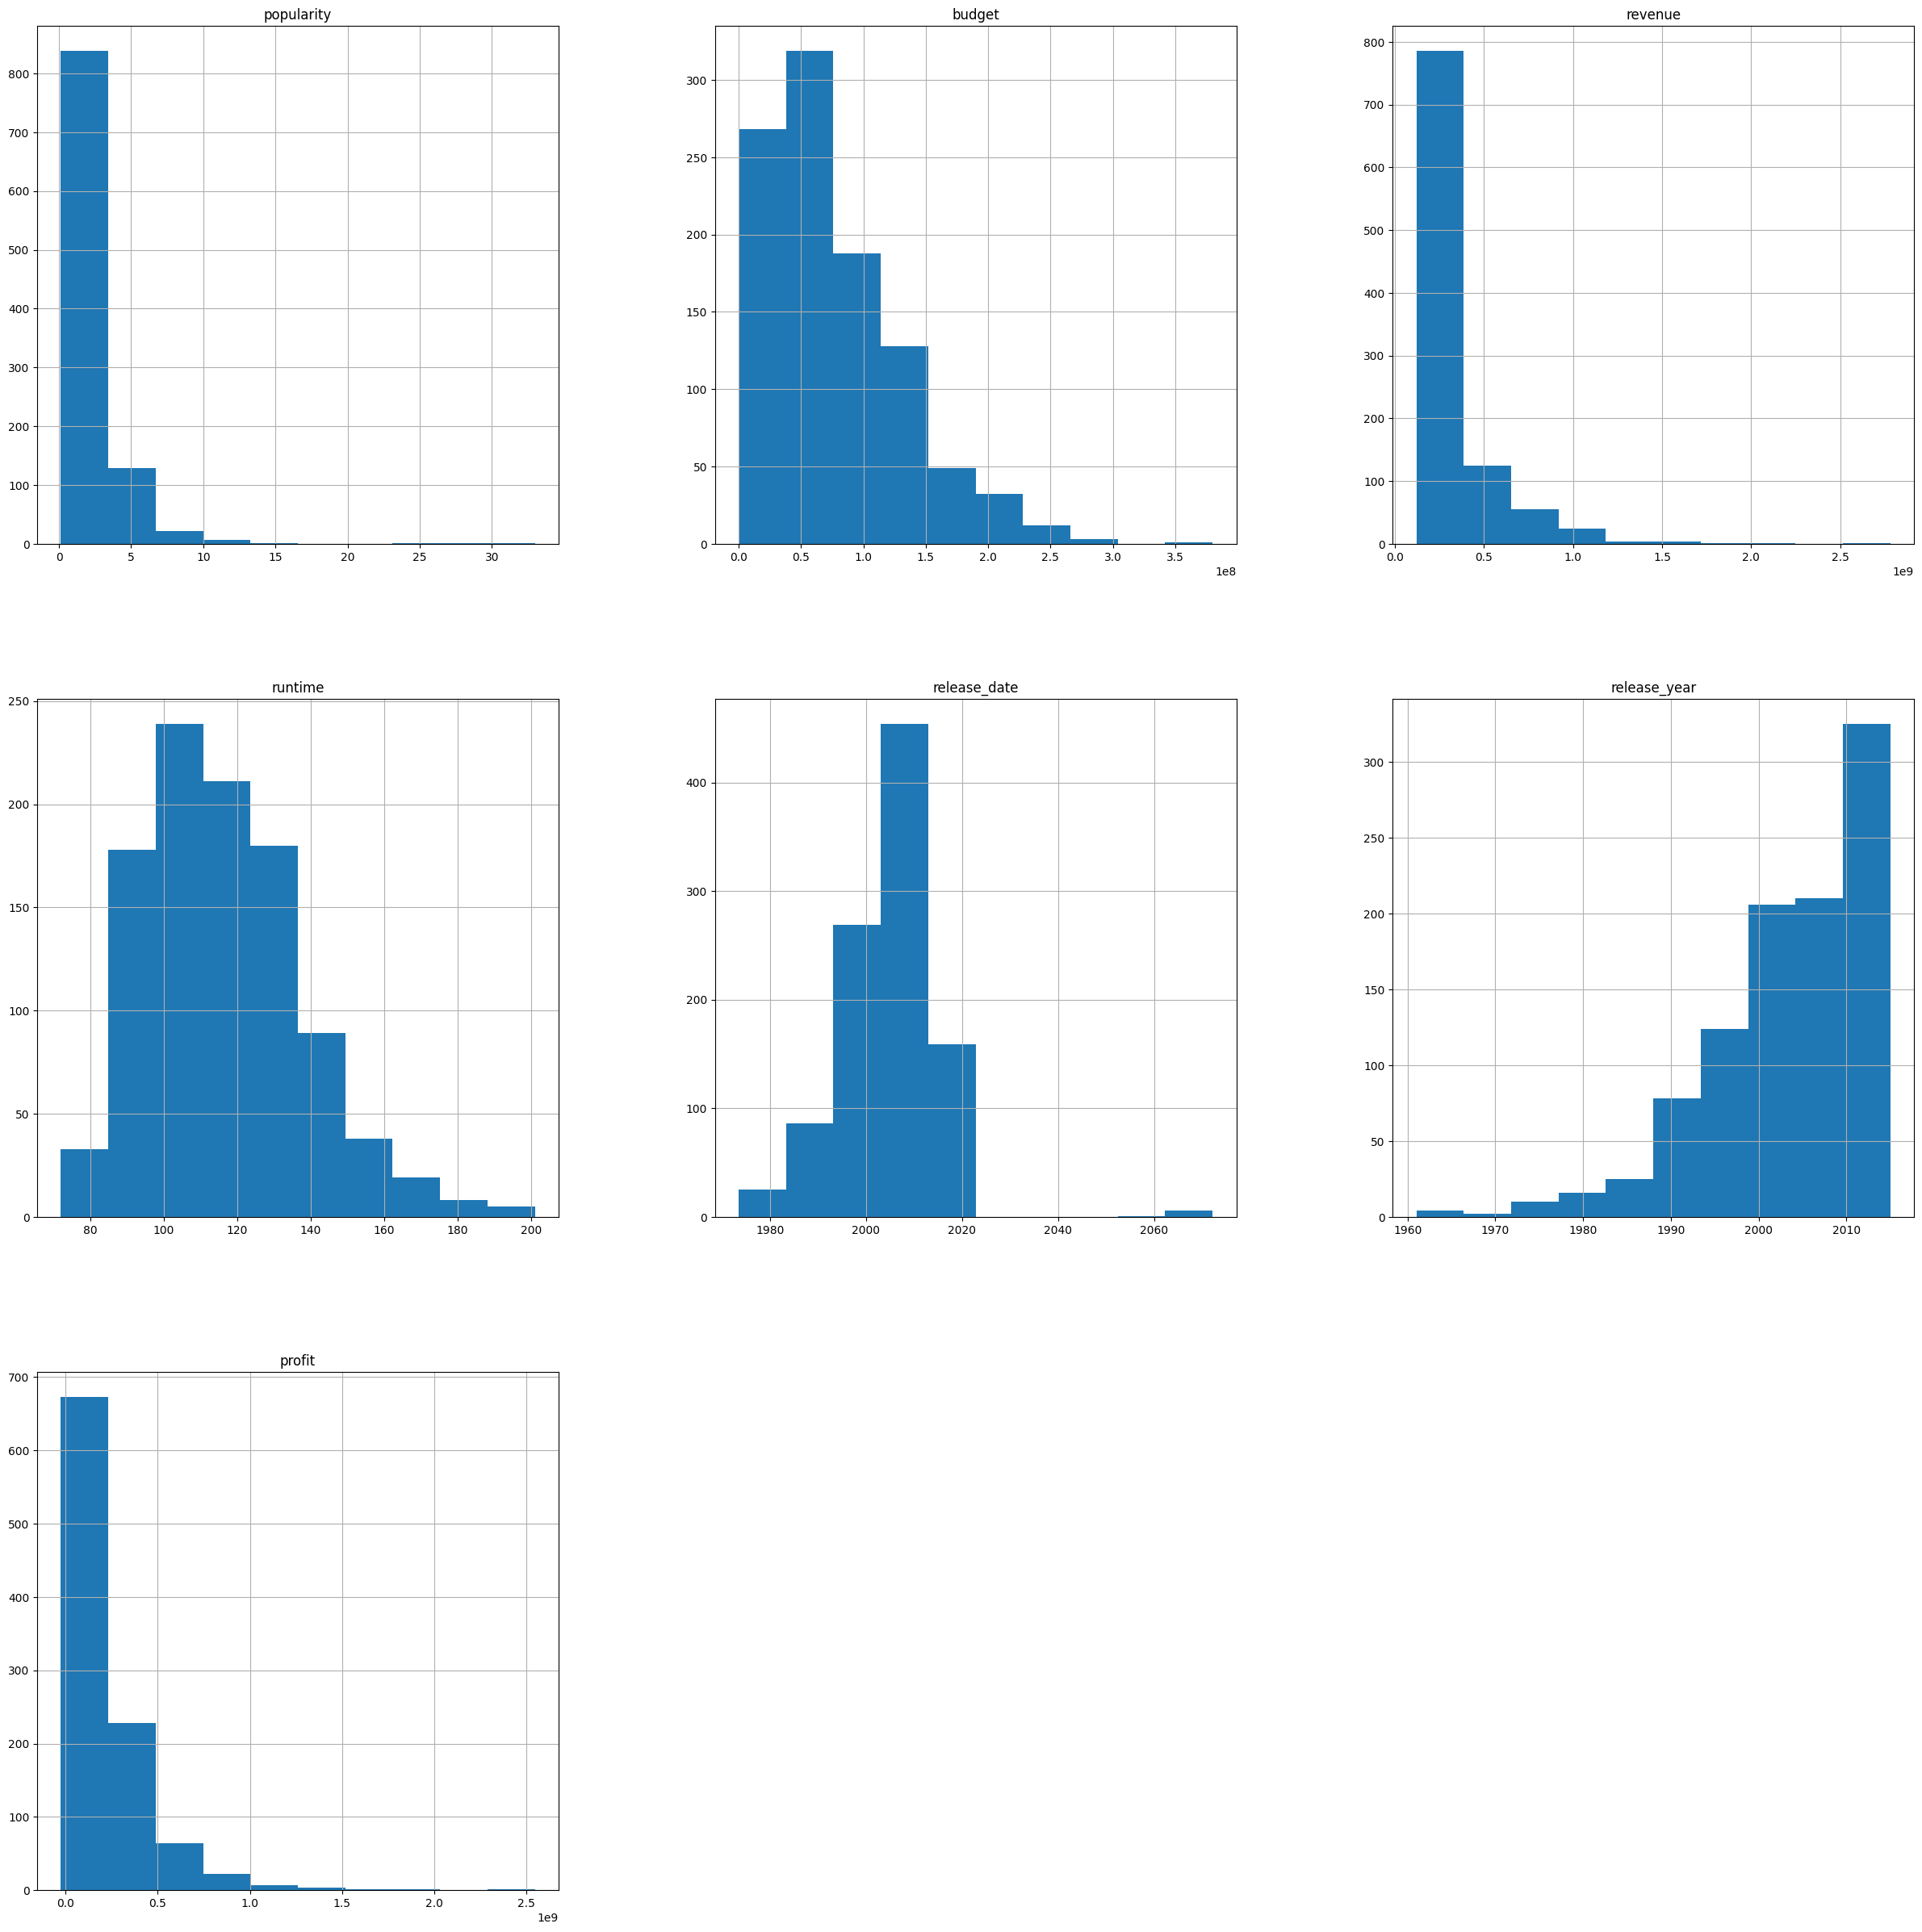

In [31]:
df.hist(figsize = (30, 30));

In [32]:
df.describe()

,popularity,budget,revenue,runtime,release_date,release_year,profit
count,1000.000000,1.000000e+03,1.000000e+03,1000.00000,1000,1000.000000,1.000000e+03
mean,2.284820,7.768619e+07,3.126380e+08,116.06200,2004-11-04 01:20:38.400000,2003.567000,2.349519e+08
min,0.131526,1.500000e+04,1.197543e+08,72.00000,1973-07-05 00:00:00,1961.000000,-2.403752e+07
25%,1.119466,3.500000e+07,1.617358e+08,100.00000,1998-12-16 12:00:00,1998.000000,1.083782e+08
50%,1.677315,6.500000e+07,2.254269e+08,114.00000,2006-04-17 12:00:00,2005.000000,1.596443e+08
75%,2.632429,1.050000e+08,3.620530e+08,129.00000,2011-07-10 12:00:00,2011.000000,2.778136e+08
max,32.985763,3.800000e+08,2.781506e+09,201.00000,2072-03-15 00:00:00,2015.000000,2.544506e+09
std,2.290748,5.543574e+07,2.456472e+08,21.31996,NaN,9.211208,2.192727e+08


In [33]:
df[['popularity', 'revenue']].corr()


,popularity,revenue
popularity,1.000000,0.516213
revenue,0.516213,1.000000


In [34]:
df[['runtime', 'revenue']].corr()


,runtime,revenue
runtime,1.000000,0.245629
revenue,0.245629,1.000000


In [35]:
df.apply(pd.to_numeric, errors='coerce').corr()


,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,profit
popularity,1.000000,0.319683,0.516213,1.0,NaN,NaN,NaN,0.224130,NaN,0.212573,0.225617,0.497483
budget,0.319683,1.000000,0.563062,1.0,NaN,NaN,NaN,0.222044,NaN,0.292090,0.420965,0.377971
revenue,0.516213,0.563062,1.000000,1.0,NaN,NaN,NaN,0.245629,NaN,0.119550,0.174274,0.977930
original_title,1.000000,1.000000,1.000000,1.0,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000
cast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tagline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
runtime,0.224130,0.222044,0.245629,1.0,NaN,NaN,NaN,1.000000,NaN,-0.047653,-0.073951,0.219038
genres,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_date,0.212573,0.292090,0.119550,1.0,NaN,NaN,NaN,-0.047653,NaN,1.000000,0.629486,0.060084
